<a href="https://colab.research.google.com/github/juacardonahe/NotebooksS_S/blob/main/1_IntroduccionSys/%201_IntroNumpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a la programación - Señales y Sistemas

- ## [Librería numpy](https://numpy.org/) (señales digitales discretas)

- ## [Librería sympy](https://www.sympy.org/es/) (emular señales continuas)

In [1]:
import numpy as np # importar libreria numpy
x = 30 #tipo int
y = 36.5 #tipo float

print(type(x),type(y)) #imprimir en pantalla

<class 'int'> <class 'float'>


# Arreglo de datos en numpy

- Señales en continuo

  $x(t) \in \mathbb{R}, \mathbb{C}$

  $t \in \mathbb{R}$

- Señales discretas

  $x[t_k] \in \mathbb{R}, \mathbb{C}$  

  $t \in \{t_0,t_1,\dots,t_{K-1}\}$; $K \in \mathbb{N}$ muestras

- Señales digitales

  $x[t_k] \in \{x_0,x_1,\dots,x_{P-1}\};$ $P\in \mathbb{N}$ estados según cantidad de bits del sistema de proceso

  $t \in \{t_0,t_1,\dots,t_{K-1}\}$; $K \in \mathbb{N}$ muestras

In [2]:
xv = np.array([0,-2.5,10]) #crear array tipo vector
xv

array([ 0. , -2.5, 10. ])

# Listas vs numpy array

- Las listas pueden contener, números, strings, y en general objetos

- Los array de numpy están pensados para procesar números (matrices, tensores).

In [ ]:
xl = [0,-2,0.5] # no es señal digital -> lista de números
xl

[0, -2, 0.5]

In [ ]:
xl = ['andres marino',0.5, 2] #lista de tres elementos con un string, un flotante y un entero
xl

['andres marino', 0.5, 2]

# Tamaños, indexación y graficar numpy array

In [ ]:
xv.shape # vector con 3 elementos - > shape retorna la forma (tamaño del arreglo)

(3,)

In [4]:
xm = np.array([[0,-2.5,10,4],[6,47,70,2],[8,10.2,-698,-0.9]]) #cada lista de números es tratada como una fila de la matriz
xm

array([[   0. ,   -2.5,   10. ,    4. ],
       [   6. ,   47. ,   70. ,    2. ],
       [   8. ,   10.2, -698. ,   -0.9]])

In [ ]:
xm.shape

(3, 4)

# En python se indexa desde 0

In [ ]:
xv = np.array([-6,5,4.2,3,8,50,16])
print(xv,xv.shape,xv[0])

[-6.   5.   4.2  3.   8.  50.  16. ] (7,) -6.0


# En Python, cuando se indexa por rangos de valores, no se incluye el último elemento

x[t_i,t_f)

In [ ]:
xv[1:5] # x[t_0] # no se incluye el elemento 5 que equivale a x[5] = 50

array([5. , 4.2, 3. , 8. ])

*Cuando se piden todos los elementos hasta el final con el operador : si se incluye el último elemento*

In [ ]:
# desde el segundo elemento hasta el ultimo
print(xv)
print(xv[1:])

[-6.   5.   4.2  3.   8.  50.  16. ]
[ 5.   4.2  3.   8.  50.  16. ]


In [ ]:
#desde antes del tercer elmento hasta el principio
print(xv)
print(xv[:3])

[-6.   5.   4.2  3.   8.  50.  16. ]
[-6.   5.   4.2]


# Para matrices se extiende la misma sintaxis para indexar vectores, pero separando la indexación por filas y por columnas

In [ ]:
print(xm)

[[   0.    -2.5   10.     4. ]
 [   6.    47.    70.     2. ]
 [   8.    10.2 -698.    -0.9]]


In [ ]:
xm[0:2,:2]

array([[ 0. , -2.5],
       [ 6. , 47. ]])

In [ ]:
xm[0:2,0]

array([0., 6.])

In [ ]:
xm[0,1:]

array([-2.5, 10. ,  4. ])

In [ ]:
np.diag(xm)#diagonal del arreglo (matriz)

array([   0.,   47., -698.])

# Simular cero y pendiente  para acondicionamiento de señales

- Se generará una función para emular el proceso de cero y pendiente en el acondicionamiento de señales.

- Las funciones principales para generar vectores equiespaciados son [linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html), [range](https://www.w3schools.com/python/ref_func_range.asp) y [arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)

In [5]:
# crear vector tiempo por rango y por número de muestras
K = 200 # número de muestras
ti = -15 # tiempo incial referencia [s]
tf = 10 # tieimpo final  [s]
# vector de tiempo equiespacioado
tv = np.linspace(start=ti,stop=tf,num=K)
print(tv)
print(tv.shape)
# tiempo muestreo se define según el rango de trabajo en segundos y la cantidad de muestras
Ts = (tf - ti)/K
print(Ts)

[-15.         -14.87437186 -14.74874372 -14.62311558 -14.49748744
 -14.3718593  -14.24623116 -14.12060302 -13.99497487 -13.86934673
 -13.74371859 -13.61809045 -13.49246231 -13.36683417 -13.24120603
 -13.11557789 -12.98994975 -12.86432161 -12.73869347 -12.61306533
 -12.48743719 -12.36180905 -12.2361809  -12.11055276 -11.98492462
 -11.85929648 -11.73366834 -11.6080402  -11.48241206 -11.35678392
 -11.23115578 -11.10552764 -10.9798995  -10.85427136 -10.72864322
 -10.60301508 -10.47738693 -10.35175879 -10.22613065 -10.10050251
  -9.97487437  -9.84924623  -9.72361809  -9.59798995  -9.47236181
  -9.34673367  -9.22110553  -9.09547739  -8.96984925  -8.84422111
  -8.71859296  -8.59296482  -8.46733668  -8.34170854  -8.2160804
  -8.09045226  -7.96482412  -7.83919598  -7.71356784  -7.5879397
  -7.46231156  -7.33668342  -7.21105528  -7.08542714  -6.95979899
  -6.83417085  -6.70854271  -6.58291457  -6.45728643  -6.33165829
  -6.20603015  -6.08040201  -5.95477387  -5.82914573  -5.70351759
  -5.5778894

- Supongamos la función cuadrática:

$x(t) = a t^2 + b;$

$\forall t \in [t_i,t_f]$

- Se pretende generar el proceso de discretización según:

$x[t_k] = a t_k^2 + b$





In [11]:
#parámetros parabola
a = 4
b = -3
xv = a*(tv**2) + b # creamos parabola en tiempo discreto-> **  pontencia
print(xv)
print(xv.shape)

[-3.         -2.99998245 -2.99992982 -2.99984209 -2.99971926 -2.99956135
 -2.99936835 -2.99914025 -2.99887706 -2.99857878 -2.9982454  -2.99787694
 -2.99747338 -2.99703473 -2.99656099 -2.99605216 -2.99550823 -2.99492922
 -2.99431511 -2.99366591 -2.99298161 -2.99226223 -2.99150775 -2.99071819
 -2.98989353 -2.98903377 -2.98813893 -2.98720899 -2.98624396 -2.98524384
 -2.98420863 -2.98313833 -2.98203293 -2.98089245 -2.97971687 -2.97850619
 -2.97726043 -2.97597958 -2.97466363 -2.97331259 -2.97192646 -2.97050524
 -2.96904892 -2.96755751 -2.96603101 -2.96446942 -2.96287274 -2.96124097
 -2.9595741  -2.95787214 -2.95613509 -2.95436295 -2.95255572 -2.95071339
 -2.94883597 -2.94692346 -2.94497586 -2.94299316 -2.94097538 -2.9389225
 -2.93683453 -2.93471147 -2.93255332 -2.93036007 -2.92813173 -2.9258683
 -2.92356978 -2.92123617 -2.91886747 -2.91646367 -2.91402478 -2.9115508
 -2.90904173 -2.90649756 -2.9039183  -2.90130396 -2.89865452 -2.89596998
 -2.89325036 -2.89049564 -2.88770583 -2.88488093 -2.88

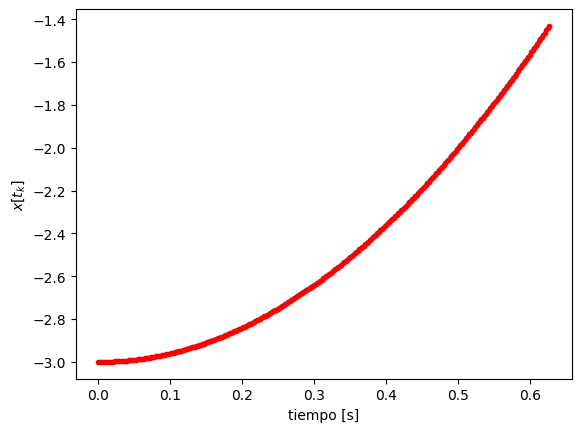

In [12]:
import matplotlib.pyplot as plt #librería para gráficas básicas en python

plt.plot(tv,xv,'r.') #vector en eje horizontal, vector eje vertical, color y marcador
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$') # $ $ ecuación latex
plt.show() #mostrar gráfica

## Cálculo de pendiente y del offset (cero)

$$ y[t_k] \in [y_{min},y_{max}]$$

$$y[t_k] = m x[t_k] + c$$

$$m = \frac{y_{max}-y_{min}}{x_{max}-x_{min}}$$

$$c = y[t_k] - m x[t_k]$$

- Se crea un código tipo función bajo el ambiente def, para generar el cero y pendiente según los valores $y_{max}$ y $y_{min}$ definidos por el usuario.

In [13]:
y_min = 0 # valor min después de cero y pendiente
y_max = 5 # valor max después de cero y pendiente
#crear funcion en python
def my_ceropen(x,ymin = -5, ymax = 5): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

In [14]:
yv = my_ceropen(xv,ymin=-15,ymax=20) #se llama la función definida en la celda anterior

In [15]:
print(yv)
print(yv.shape)

[-15.         -14.99960851 -14.99843402 -14.99647655 -14.99373609
 -14.99021264 -14.9859062  -14.98081677 -14.97494435 -14.96828895
 -14.96085055 -14.95262917 -14.94362479 -14.93383743 -14.92326708
 -14.91191374 -14.89977741 -14.88685809 -14.87315578 -14.85867048
 -14.8434022  -14.82735092 -14.81051666 -14.79289941 -14.77449917
 -14.75531594 -14.73534972 -14.71460051 -14.69306831 -14.67075312
 -14.64765495 -14.62377378 -14.59910963 -14.57366249 -14.54743236
 -14.52041923 -14.49262313 -14.46404403 -14.43468194 -14.40453686
 -14.3736088  -14.34189774 -14.3094037  -14.27612667 -14.24206664
 -14.20722363 -14.17159763 -14.13518864 -14.09799667 -14.0600217
 -14.02126374 -13.9817228  -13.94139887 -13.90029194 -13.85840203
 -13.81572913 -13.77227324 -13.72803436 -13.68301249 -13.63720764
 -13.59061979 -13.54324896 -13.49509513 -13.44615832 -13.39643852
 -13.34593573 -13.29464995 -13.24258118 -13.18972942 -13.13609467
 -13.08167694 -13.02647621 -12.9704925  -12.9137258  -12.85617611
 -12.797843

- Se grafican la señal original y la señal acondicionada mediante [subplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html)

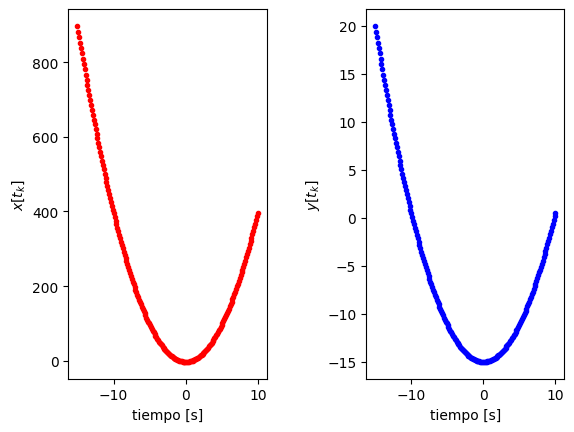

In [ ]:
plt.subplot(121) # 1 = #filas, 2 = #columnas, 1 = # dibujo
plt.plot(tv,xv,'r.')
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$')

plt.subplot(122)
plt.plot(tv,yv,'b.')
plt.xlabel('tiempo [s]')
plt.ylabel('$y[t_k]$')
plt.subplots_adjust(hspace=0.5,wspace=0.5) #ajustar espaciado entre gráficas
plt.show()

Text(0, 0.5, '$x[t_k]$')

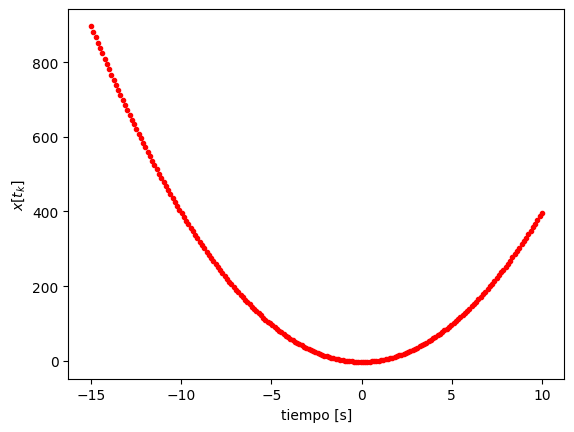

In [ ]:
plt.plot(tv,xv,'r.')
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$')

Text(0, 0.5, '$y[t_k]$')

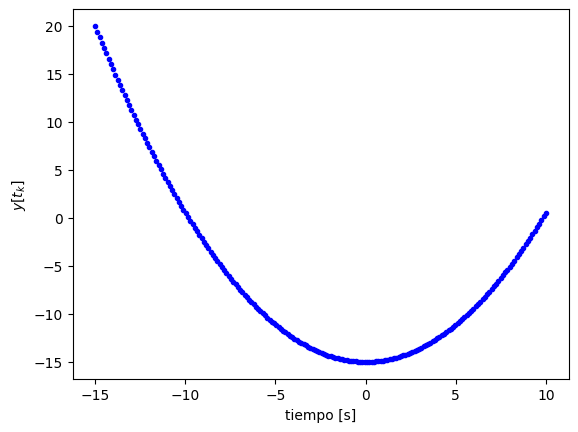

In [ ]:
plt.plot(tv,yv,'b.')
plt.xlabel('tiempo [s]')
plt.ylabel('$y[t_k]$')

- Se ilustra nuevamente el proceso de acondicionamiento cero y pendiente utilizando una función seno:

$$x[t_k] = A \sin[w_o t + \phi]$$

$$x[t_k] = A \sin[2 \pi F_o t] = A \sin[2 \pi t / T_o ]$$



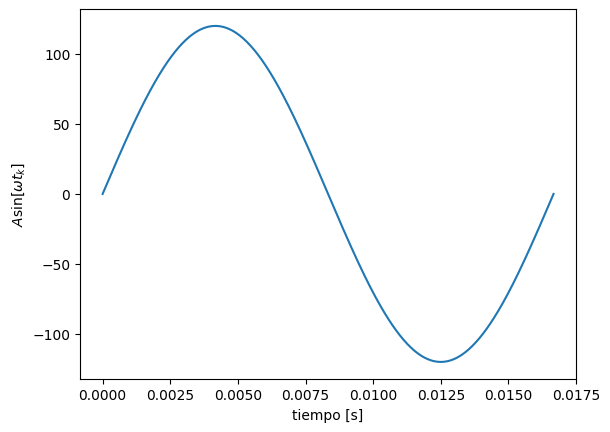

In [ ]:
K = 500 # número de muestras
T_o = 1/60 # periodo función sin
A = 120 # amplitud
ti = 0 #tiempo inicial
tf = T_o #tiempo final
tv = np.linspace(ti,tf,num=K) #vector de datos en tiempo
xv = A * np.sin(2*np.pi*tv/T_o) #vector de amplitud

plt.plot(tv,xv)
plt.xlabel('tiempo [s]')
plt.ylabel('$A\sin[\omega t_k]$')
plt.show()

In [16]:
yv = my_ceropen(xv,ymin=0,ymax=5) #se utiliza la función ya creada de cero y pendiente

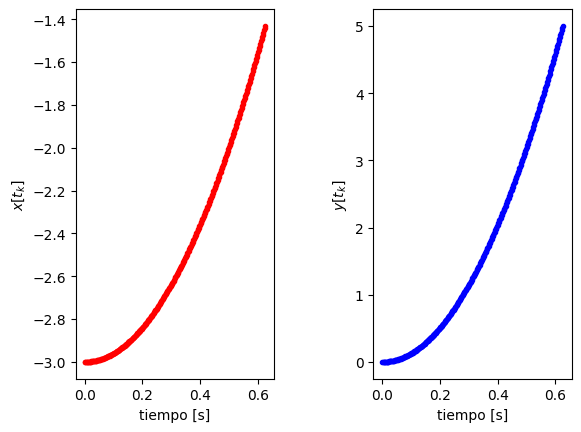

In [17]:
plt.subplot(121) # 1 = #filas, 2 = #columnas, 1 = # dibujo
plt.plot(tv,xv,'r.')
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$')

plt.subplot(122)
plt.plot(tv,yv,'b.')
plt.xlabel('tiempo [s]')
plt.ylabel('$y[t_k]$')
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.show()

# Lab. 1 - Adquisición señal cuasiperiodica
### $x(t) = 8 cos (100t) + 10 sen (20t) - 7 cos (300t -π/4)$

In [53]:
#Ejemplo de señal despues de cero y pendiente y discretización
#Recuerde que el proceso de discretización debe ser implementado
from scipy.spatial.distance import cdist

#señal original
F1 = 100/(2*(np.pi))
F2 = 20/(2*(np.pi))
F3 = 300/(2*(np.pi))
T1 = 1/F1
T2 = 1/F2
T3 = 1/F3
TT = ((np.pi)/10)
A1 = 8
A2 = 10
A3 = 7
Fs = 10*F3 #asegurar nyquist
Ts = 1/Fs
tv = np.arange(0,2*TT,Ts)#procesar dos periodos discretizados
y1 = A1*np.cos(100*tv)
y2 = A2*np.sin(20*tv)
y3 = A3*np.cos(300*tv-(np.pi)/7)

y = y1 + y2 - y3

#cero y pendiente
ycs = my_ceropen(y, ymin=0,ymax=5)

#número de bits y vector de cuantización
nbits = 5
rmin = 0
rmax = 5
ve = np.linspace(rmin,rmax,2**nbits) # (rmax-rmin)/(2^#bits - 1) -> si se quiere incluir rmin y rmax

#distancias y cero pendiente a vector cuantizacion
d = cdist(ycs.reshape(-1,1),ve.reshape(-1,1)) #se utiliza reshape(-1,1) para generar vectores columna como lo pide cdist
d.shape # d es una matriz de 500 x 8, ej: la fila 1 incluye la distancia euclidea entre y[0] y los 8 elementos en ve

(300, 32)

In [54]:
#se requiere identificar el elemento ve[j] más cercano a y[i] para genera señal cuantizada
ind = np.argmin(d,axis=1) #el parámetro axis = 1 indica que busca la posición a lo largo de las columnas del elemento más pequeño en cada fila
ind

array([17, 16, 18, 20, 23, 25, 24, 22, 18, 14, 11, 10, 11, 13, 16, 19, 19,
       18, 16, 14, 13, 14, 17, 21, 26, 29, 31, 30, 28, 26, 24, 23, 24, 27,
       29, 30, 30, 27, 23, 19, 15, 14, 14, 17, 19, 21, 22, 20, 18, 16, 14,
       15, 17, 21, 25, 29, 30, 29, 26, 23, 21, 20, 21, 23, 25, 26, 25, 22,
       18, 13,  9,  8,  8, 10, 12, 14, 15, 13, 11,  8,  6,  7,  9, 13, 17,
       20, 21, 20, 18, 15, 12, 12, 13, 15, 17, 18, 17, 14, 10,  5,  2,  0,
        1,  3,  5,  7,  8,  7,  4,  2,  1,  1,  4,  8, 12, 16, 17, 17, 14,
       12, 10,  9, 11, 13, 15, 17, 16, 14, 10,  6,  2,  1,  2,  5,  8, 10,
       11, 10,  8,  6,  5,  6,  9, 13, 18, 22, 23, 23, 21, 19, 17, 16, 18,
       20, 23, 25, 24, 22, 18, 14, 11, 10, 11, 13, 16, 19, 19, 18, 16, 14,
       13, 14, 17, 21, 26, 29, 31, 30, 28, 26, 24, 23, 24, 27, 29, 30, 30,
       27, 23, 19, 15, 14, 14, 17, 19, 21, 22, 20, 18, 16, 14, 15, 17, 21,
       25, 29, 30, 29, 26, 23, 21, 20, 21, 23, 25, 26, 25, 22, 18, 13,  9,
        8,  8, 10, 12, 14

In [55]:
print(ycs[1],ind[1],ve[ind[1]]) # para y[50] = 0.58, el estado más cercano en ve es el elemento 1 que corresponde a ve[1]=0.71

2.660694773335611 16 2.5806451612903225


Podemos crear una función de cuantización y evaluarla punto a punto a partir de cada muestra después de cero y spam discretizada

In [56]:
#función cuantización punto a punto

def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

In [57]:
#recorrer vector cero y spam discretizado para cuantizar

for i in range(ycs.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(ycs[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(ycs[i],ve)) #apilar datos cuantizando si i>0

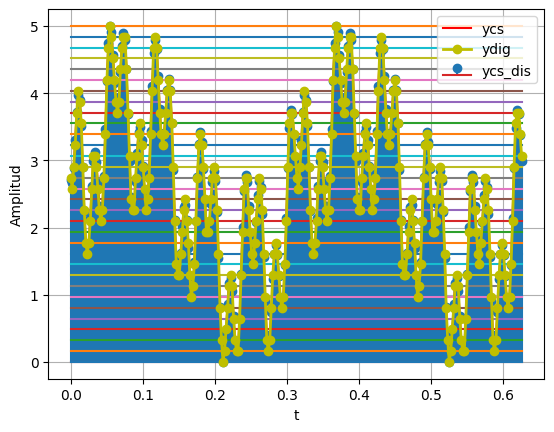

In [58]:
#graficar señales

plt.plot(tv,ycs,c='r', label='ycs')#cs continua

plt.stem(tv,ycs, label='ycs_dis')#cs discreta

#estados de cuantización

for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()